This notebook is about the Monte-Carlo methods for policy evaluation (first-visit and every-visit), as described in Sutton's Reinforcement Learning book, 2nd edition, page 76.

In [1]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.monte_carlo import *

In [2]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.monte_carlo import *

In [3]:
%matplotlib inline

In [4]:
from baserl.grid_world import GridWorld
mdp = GridWorld()
episode_generator = ModelBasedEpisodeGenerator(mdp.states(), mdp.is_terminal, mdp.actions,
                                               mdp.transitions, 
                                               max_episode_len=100,
                                               fixed_start_state=None,
                                               with_exploring_starts=False,
                                               verbose=False)

In [5]:
episode = episode_generator.generate(make_random_policy(mdp.states(), mdp.actions))
print (len(episode), episode)

11 [((1, 0), 'R', -1), ((1, 1), 'D', -1), ((2, 1), 'R', -1), ((2, 2), 'U', -1), ((1, 2), 'D', -1), ((2, 2), 'D', -1), ((3, 2), 'L', -1), ((3, 1), 'D', -1), ((3, 1), 'D', -1), ((3, 1), 'R', -1), ((3, 2), 'R', -1)]


In [6]:
# Compare with ideal value function, plot RMSE vs #episodes
def compare_v_mse(ideal_v, actual_v):
    sum_diffs = 0.0
    num = 0
    for k, val in ideal_v.items():
        sum_diffs += (val - actual_v[k]) ** 2
        num += 1
    return sum_diffs / num

# We know the ideal Value Function for the Grid World - this is mentioned in the end of Figure 4.1, page 62 of
# Sutton's RL book. It can also be computed by running Iterative Policy Evaluation from chapter 4 for a longer time.
ideal_v_mat = [
[  0, -14, -20, -22], 
[-14, -18, -20, -20], 
[-20, -20, -18, -14], 
[-22, -20, -14,   0]
]
ideal_v = {}
for x in range(len(ideal_v_mat)):
    for y in range(len(ideal_v_mat[0])):
        ideal_v[(x, y)] = ideal_v_mat[x][y]

In [7]:
# First-visit
policy = make_random_policy(mdp.states(), mdp.actions)
start_time = time.time()
v_history = []
v = monte_carlo_policy_evaluation(every_visit=False,
                                  policy=policy,
                                  gamma=mdp.gamma(),
                                  episode_generator=episode_generator,
                                  num_episodes=100,
                                  verbose=False,
                                  v_history=v_history)
print(time.time() - start_time)

0.022090673446655273


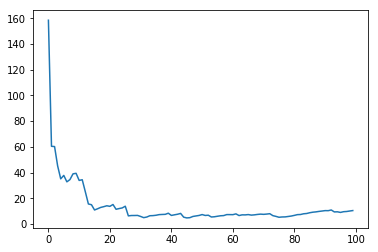

In [8]:
# Comparing the value function at each step of the First-Visit algorithm, with the ideal value function.
plt.plot([compare_v_mse(ideal_v, actual_v) for actual_v in v_history])

In [9]:
mdp.print_value(v)

  0.00 -11.19 -18.28 -18.38 
-11.78 -14.86 -16.36 -16.47 
-17.18 -16.10 -15.33  -9.31 
-18.77 -15.15 -10.00   0.00 


In [10]:
greedy_policy_from_v = make_greeedy_policy_from_v(v, mdp.states(), mdp.actions, mdp.transitions, mdp.gamma())
mdp.print_policy(greedy_policy_from_v)

  UL    L    L    D 
   U    U    L    D 
   U    U    R    D 
   R    R    R   DR 


In [11]:
# Every visit
policy = make_random_policy(mdp.states(), mdp.actions)
start_time = time.time()
v_history = []
v = monte_carlo_policy_evaluation(every_visit=True,
                                  policy=policy,
                                  gamma=mdp.gamma(),
                                  episode_generator=episode_generator,
                                  num_episodes=100,
                                  verbose=False,
                                  v_history=v_history)
print(time.time() - start_time)

0.034088134765625


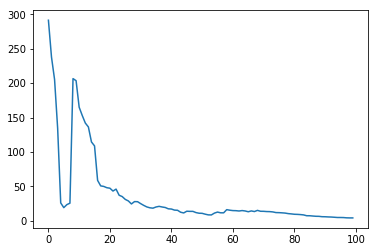

In [12]:
# Comparing the value function at each step of the Every-Visit algorithm, with the ideal value function.
plt.plot([compare_v_mse(ideal_v, actual_v) for actual_v in v_history])

In [13]:
mdp.print_value(v)

  0.00 -16.08 -21.04 -25.89 
-14.40 -18.68 -20.39 -22.01 
-20.50 -21.89 -19.33 -16.78 
-25.80 -23.51 -14.51   0.00 


In [14]:
greedy_policy_from_v = make_greeedy_policy_from_v(v, mdp.states(), mdp.actions, mdp.transitions, mdp.gamma())
mdp.print_policy(greedy_policy_from_v)

  UL    L    L    L 
   U    L    L    D 
   U    U    D    D 
   U    R    R   DR 
